In [1]:
import yfinance as yf
import pandas as pd

# Download stock data
df = yf.download("MSFT", start="2022-01-01", end="2023-12-31")

# Ensure columns: Open, High, Low, Close, Volume
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-01-03  325.038086  328.193796  320.212277  325.620684  28865100
2022-01-04  319.464600  325.475014  316.658432  325.115724  32674300
2022-01-05  307.200989  316.609859  306.812600  316.405930  40054300
2022-01-06  304.773560  309.453726  302.452885  304.064728  39646100
2022-01-07  304.928925  307.317546  301.093512  305.035719  32720000


In [3]:
import talib

# Calculate indicators for each ticker
for ticker in df['Close'].columns:
    df['RSI', ticker] = talib.RSI(df['Close'][ticker], timeperiod=14)
    df['MA_50', ticker] = talib.SMA(df['Close'][ticker], timeperiod=50)
    df['MA_200', ticker] = talib.SMA(df['Close'][ticker], timeperiod=200)
    df['MACD', ticker], df['MACD_signal', ticker], df['MACD_hist', ticker] = talib.MACD(
        df['Close'][ticker], fastperiod=12, slowperiod=26, signalperiod=9
    )

In [4]:
import yfinance as yf

# Fetch data for AAPL
aapl = yf.Ticker("AAPL")
price_data = aapl.history(start="2022-01-01", end="2023-12-31")
print(price_data.head())

# Calculate daily returns
returns = price_data['Close'].pct_change()
print("Daily returns:\n", returns.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  174.542917  179.499574  174.425140  178.645645   
2022-01-04 00:00:00-05:00  179.254206  179.558473  175.809076  176.378357   
2022-01-05 00:00:00-05:00  176.290033  176.839679  171.411899  171.686722   
2022-01-06 00:00:00-05:00  169.507737  172.059683  168.467333  168.820679   
2022-01-07 00:00:00-05:00  169.694257  170.921151  167.868637  168.987564   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  104487900        0.0           0.0  
2022-01-04 00:00:00-05:00   99310400        0.0           0.0  
2022-01-05 00:00:00-05:00   94537600        0.0           0.0  
2022-01-06 00:00:00-05:00   96904000        0.0           0.0  
2022-01-07 00:00:00-05:00   86709100        0.0           0.0  
Daily return

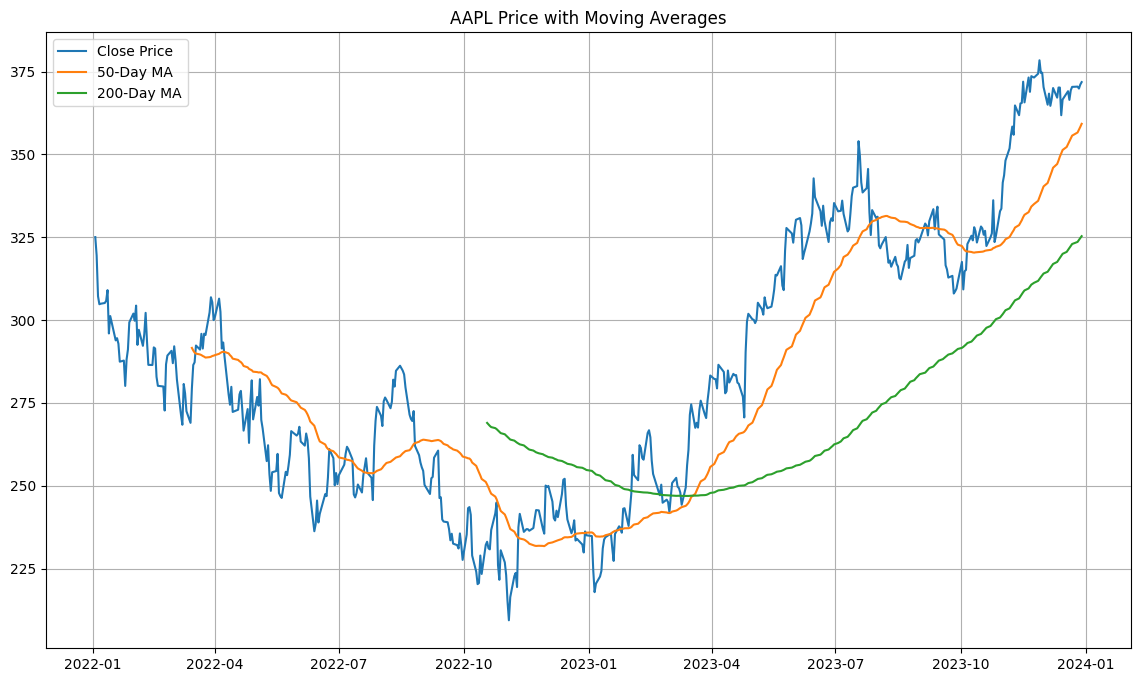

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot closing price and moving averages
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_50'], label='50-Day MA')
plt.plot(df['MA_200'], label='200-Day MA')
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

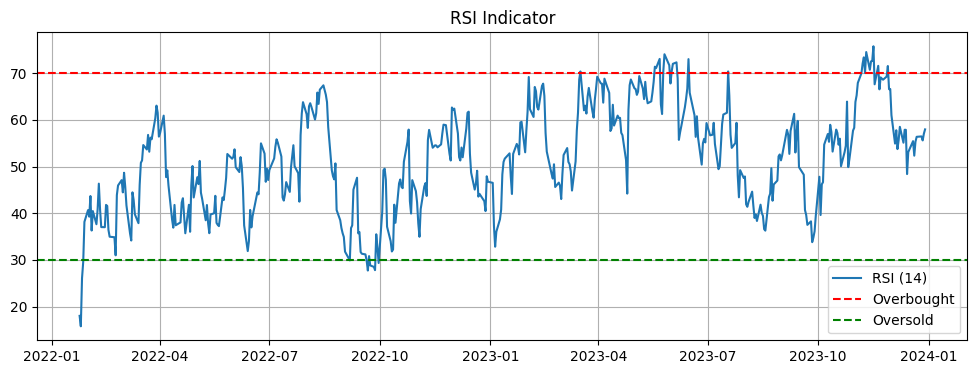

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--', label='Overbought')
plt.axhline(30, color='g', linestyle='--', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.grid()
plt.show()

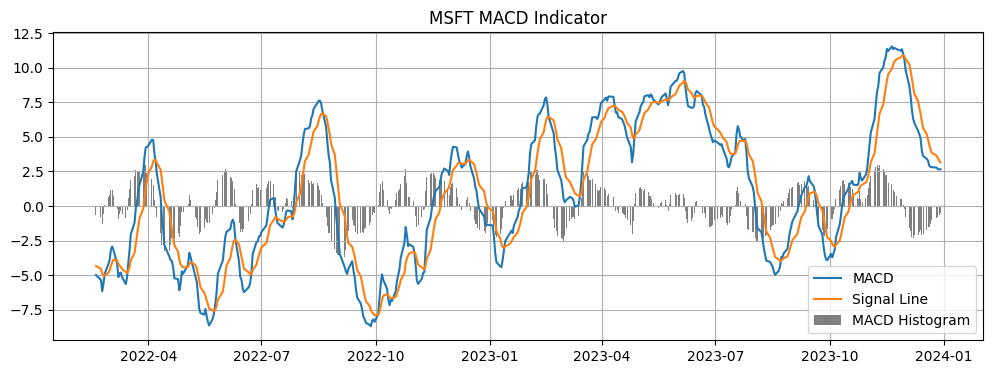

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(df['MACD', 'MSFT'], label='MACD')
plt.plot(df['MACD_signal', 'MSFT'], label='Signal Line')
plt.bar(df.index, df['MACD_hist', 'MSFT'], label='MACD Histogram', color='gray')
plt.title("MSFT MACD Indicator")
plt.legend()
plt.grid()
plt.show()

